In [19]:
import itertools

import numpy as np
import pandas as pd

In [25]:
df = pd.DataFrame({
    'a': [1, 2, 3, 4],
    'b': range(4, 4 + 4),
    'c': iter("room"),
    'd': itertools.islice(itertools.cycle("ABC"), 4),
})

In [26]:
df

,a,b,c,d
0,1,4,r,A
1,2,5,o,B
2,3,6,o,C
3,4,7,m,A


In [27]:
print(df)

   a  b  c  d
0  1  4  r  A
1  2  5  o  B
2  3  6  o  C
3  4  7  m  A


In [28]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
list(df.columns)

['a', 'b', 'c', 'd']

In [30]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [31]:
df.dtypes

a     int64
b     int64
c    object
d    object
dtype: object

In [38]:
df.a + df.b

0     5
1     7
2     9
3    11
dtype: int64

In [39]:
df['a']

0    1
1    2
2    3
3    4
Name: a, dtype: int64

In [42]:
type(df.a.to_numpy())

numpy.ndarray

In [41]:
type(df)

pandas.core.frame.DataFrame

In [45]:
df.T.dtypes

0    object
1    object
2    object
3    object
dtype: object

In [46]:
df.dtypes

a     int64
b     int64
c    object
d    object
dtype: object

In [66]:
def my_f1(df, par1):
    print(list(df.columns) * par1)
    return df

(
    df
    .assign(
        e=lambda d: d.a + d.b,
        f=lambda d: d.a * d.b,
        g=lambda d: d.e + d.f
    )
    .pipe(my_f1, 4)
    # [['e', 'a']]
    # .plot()
)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'a', 'b', 'c', 'd', 'e', 'f', 'g']


,a,b,c,d,e,f,g
0,1,4,r,A,5,4,9
1,2,5,o,B,7,10,17
2,3,6,o,C,9,18,27
3,4,7,m,A,11,28,39


In [48]:
df

,a,b,c,d
0,1,4,r,A
1,2,5,o,B
2,3,6,o,C
3,4,7,m,A


In [70]:
df1 = pd.DataFrame(np.random.rand(1000, 2), columns="x y".split())

In [72]:
df1.head(8)

,x,y
0,0.617944,0.178551
1,0.437192,0.071756
2,0.093971,0.792252
3,0.539884,0.964497
4,0.896673,0.530429
5,0.397808,0.103922
6,0.621897,0.391082
7,0.194385,0.832945


In [78]:
(
    df1
    .assign(
        square_dist=lambda d: d.x ** 2 + d.y ** 2,
        in_circle=lambda d: d.square_dist <= 1
    )
    # .head()
    ['in_circle']
    .sum()
) / df1.shape[0] * 4

3.192

<Axes: xlabel='x', ylabel='y'>

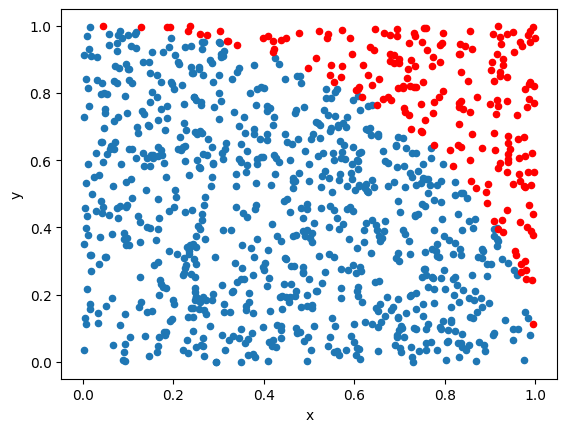

In [83]:
ax = (
    df1
    .assign(
        square_dist=lambda d: d.x ** 2 + d.y ** 2,
        in_circle=lambda d: d.square_dist <= 1
    )
    # .head()
    .query("in_circle")
    .plot(kind='scatter', x='x', y='y')
)

(
    df1
    .assign(
        square_dist=lambda d: d.x ** 2 + d.y ** 2,
        in_circle=lambda d: d.square_dist <= 1
    )
    # .head()
    .query("not in_circle")
    .plot(kind='scatter', x='x', y='y', ax=ax, color='red')
)

In [84]:
import seaborn as sns

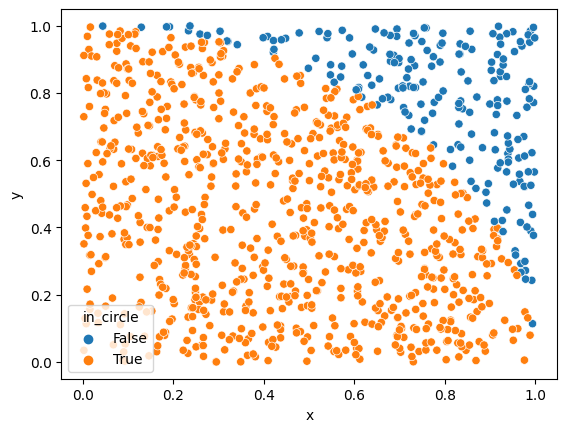

In [86]:
for_sns = (
    df1
    .assign(
        square_dist=lambda d: d.x ** 2 + d.y ** 2,
        in_circle=lambda d: d.square_dist <= 1
    )
    # .head()
    # .query("in_circle")
    # .plot(kind='scatter', x='x', y='y')
)

sns.scatterplot(x='x', y='y', data=for_sns, hue='in_circle');

In [165]:
for_sns.head()

,x,y,square_dist,in_circle
0,0.617944,0.178551,0.413736,True
1,0.437192,0.071756,0.196285,True
2,0.093971,0.792252,0.636493,True
3,0.539884,0.964497,1.221728,False
4,0.896673,0.530429,1.085378,False


In [87]:
def all_words():
    for paragraph in range(10):
        for line in range(20):
            for word_ind in range(8):
                yield np.random.choice(
                    "good morning everyone, hope you have a nice day. How was the travel here?".split()
                ), paragraph, line, word_ind

In [90]:
df3 = pd.DataFrame.from_records(
    all_words(),
    columns="word paragpraph line word_ind".split()
)

In [91]:
df3.head()

,word,paragpraph,line,word_ind
0,the,0,0,0
1,was,0,0,1
2,nice,0,0,2
3,hope,0,0,3
4,hope,0,0,4


In [100]:
def handle_group(df):
    print(df.shape)
    return df

(
    df3
    .groupby('word')
    .apply(handle_group)
    .reset_index(drop=True)
)

(141, 4)
(112, 4)
(104, 4)
(108, 4)
(112, 4)
(121, 4)
(112, 4)
(109, 4)
(123, 4)
(109, 4)
(124, 4)
(109, 4)
(104, 4)
(112, 4)


,word,paragpraph,line,word_ind
0,How,0,1,1
1,How,0,1,2
2,How,0,1,5
3,How,0,5,0
4,How,0,5,3
...,...,...,...,...
1595,you,9,9,1
1596,you,9,10,1
1597,you,9,11,0
1598,you,9,16,0


In [190]:
content = """col1,col2,col3,col4
1,2,,hello
10,,20,bye
8,1.2,10,abc
"""

In [191]:
from io import StringIO

In [192]:
df4 = pd.read_csv(StringIO(content))

In [193]:
df4

,col1,col2,col3,col4
0,1,2.0,NaN,hello
1,10,NaN,20.0,bye
2,8,1.2,10.0,abc


In [194]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    3 non-null      int64  
 1   col2    2 non-null      float64
 2   col3    2 non-null      float64
 3   col4    3 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 224.0+ bytes


In [197]:
(
    df4
    .assign(
        col2_isna=lambda d: d.col2.isna(),
        col2=lambda d: d.col2.fillna(-1)
    )
)

,col1,col2,col3,col4,col2_isna
0,1,2.0,NaN,hello,False
1,10,-1.0,20.0,bye,True
2,8,1.2,10.0,abc,False


In [198]:
df4.describe()

,col1,col2,col3
count,3.000000,2.000000,2.000000
mean,6.333333,1.600000,15.000000
std,4.725816,0.565685,7.071068
min,1.000000,1.200000,10.000000
25%,4.500000,1.400000,12.500000
50%,8.000000,1.600000,15.000000
75%,9.000000,1.800000,17.500000
max,10.000000,2.000000,20.000000


In [199]:
df4.describe(include='object')

,col4
count,3
unique,3
top,hello
freq,1


In [107]:
(
    df4.memory_usage(deep=True)
    .sum()
)

382

In [119]:
(
    df3
    .astype({'word': 'category'})
    .memory_usage(deep=True)
    .sum()
    # .dtypes
)

41990

In [127]:
(
    df3
    .loc[lambda d: d.paragpraph < 3, ['line', 'word_ind']]
)

,line,word_ind
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
475,19,3
476,19,4
477,19,5
478,19,6


In [129]:
(
    df3
    .iloc[:1]
)

,word,paragpraph,line,word_ind
0,the,0,0,0


In [132]:
df3.loc[[0, 1, 4], 'word']

0     the
1     was
4    hope
Name: word, dtype: object

In [189]:
def my_own_agg(se):
    # print(type(se))
    return se.iloc[0]

(
    df3
    .groupby('word')
    [['line', 'word_ind']]
    .agg(
        count_line=('line', 'count'),
        count_mean=('line', my_own_agg),
        count_word_ind=('word_ind', 'count')
    )
)

,count_line,count_mean,count_word_ind
word,,,
How,141,1,141
a,112,3,112
day.,104,0,104
"everyone,",108,4,108
good,112,2,112
have,121,2,121
here?,112,0,112
hope,109,0,109
morning,123,3,123


In [152]:
(
    df3
    .groupby(['word', 'paragpraph'])
    .count()
    .unstack()
)

line                                     word_ind                  \
paragpraph    0   1   2   3   4   5   6   7   8   9        0   1   2   3   4   
word                                                                           
How          14  11  15  13  16  12  13  15  20  12       14  11  15  13  16   
a             6  16   8  11  12  11  10  15   7  16        6  16   8  11  12   
day.         12  11  14   7  12   9  11   7  12   9       12  11  14   7  12   
everyone,    14   5  12  13  16  15   8   1  10  14       14   5  12  13  16   
good          8  18   8   9   8  15  14  13  11   8        8  18   8   9   8   
have         13  12   6  14  17  11  16   9  11  12       13  12   6  14  17   
here?        10  12  10   9  10   7  14  19   8  13       10  12  10   9  10   
hope         13  10  10  10  11  15   5  11  17   7       13  10  10  10  11   
morning      14  10  14  15   7  14  12   9  16  12       14  10  14  15   7   
nice         10  10  17   6  11  10  11  17   6  11       10  10  17   6  11   
the          15  12  15  14  11   9  11  13   8  16       15  12  15  14  11   
travel       13  12   7  15  10  11  15   7   9  10       13  12   7  15  10   
was           7  10   8  15  10   7  11  12  10  14        7  10   8  15  10   
you          11  11  16   9   9  14   9  12  15   6       11  11  16   9   9   

                                
paragpraph   5   6   7   8   9  
word                            
How         12  13  15  20  12  
a           11  10  15   7  16  
day.         9  11   7  12   9  
everyone,   15   8   1  10  14  
good        15  14  13  11   8  
have        11  16   9  11  12  
here?        7  14  19   8  13  
hope        15   5  11  17   7  
morning     14  12   9  16  12  
nice        10  11  17   6  11  
the          9  11  13   8  16  
travel      11  15   7   9  10  
was          7  11  12  10  14  
you         14   9  12  15   6

In [162]:
def my_style(item):
    return "color: red;" if isinstance(item, int) and item < 3 else "color: black;"

df3.style.applymap(my_style)

,word,paragpraph,line,word_ind
0,the,0,0,0
1,was,0,0,1
2,nice,0,0,2
3,hope,0,0,3
4,hope,0,0,4
5,day.,0,0,5
6,here?,0,0,6
7,the,0,0,7
8,you,0,1,0
9,How,0,1,1


In [166]:
def my_style_axis1(row):
    return [
        "background: red;" if isinstance(item, int) and item < 3 else "color: black;"
        for item in row
    ]

df3.head().style.apply(my_style_axis1, axis=1)

,word,paragpraph,line,word_ind
0,the,0,0,0
1,was,0,0,1
2,nice,0,0,2
3,hope,0,0,3
4,hope,0,0,4


In [167]:
# & | ()

In [171]:
chess_df = pd.DataFrame(np.zeros((8, 8)), columns=iter("ABCDEFGH"))

In [179]:
cycle1 = itertools.cycle(["background: yellow;", ""])
cycle2 = itertools.cycle(["", "background: yellow;"])
my_cycle = itertools.cycle([cycle1, cycle2])

chess_df.style.apply(lambda _: [x for _, x in zip(range(8), next(my_cycle))])

,A,B,C,D,E,F,G,H
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [180]:
# np.NaN

In [181]:
# .dt
# .str

In [205]:
df_dt = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

In [206]:
df_dt

,year,month,day
0,2015,2,4
1,2016,3,5


In [214]:
(
    pd.to_datetime(df_dt)
    .to_frame()
    # .dt.year
    .assign(
        a=[1, 2],
        b=['hello', "bye"]
    )
    [0]
    .dt.year
)

0    2015
1    2016
Name: 0, dtype: int32

In [204]:
df3.word.value_counts(normalize=False) / 1600

word
How          0.088125
the          0.077500
morning      0.076875
have         0.075625
here?        0.070000
you          0.070000
good         0.070000
a            0.070000
nice         0.068125
hope         0.068125
travel       0.068125
everyone,    0.067500
was          0.065000
day.         0.065000
Name: count, dtype: float64

In [215]:
df3.head()

,word,paragpraph,line,word_ind
0,the,0,0,0
1,was,0,0,1
2,nice,0,0,2
3,hope,0,0,3
4,hope,0,0,4


In [224]:
def our_func(entry):
    return next(iter(entry))

(
    df3
    .word
    .apply(our_func)
    # .str.endswith("?")
    # .sum()
)

0       t
1       w
2       n
3       h
4       h
       ..
1595    n
1596    n
1597    h
1598    H
1599    y
Name: word, Length: 1600, dtype: object

In [225]:
type(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   word        1600 non-null   object
 1   paragpraph  1600 non-null   int64 
 2   line        1600 non-null   int64 
 3   word_ind    1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 50.1+ KB


NoneType

In [226]:
a = 4

In [227]:
a > 3 and a % 2 == 0

True

In [229]:
(
    df3
    .loc[lambda d: (d.line % 2 == 0) & (d.word_ind % 2 == 0)]
)

,word,paragpraph,line,word_ind
0,the,0,0,0
2,nice,0,0,2
4,hope,0,0,4
6,here?,0,0,6
16,the,0,2,0
...,...,...,...,...
1574,nice,9,16,6
1584,day.,9,18,0
1586,"everyone,",9,18,2
1588,travel,9,18,4


In [230]:
df1.columns

Index(['x', 'y'], dtype='object')

In [232]:
df3.columns

Index(['word', 'paragpraph', 'line', 'word_ind'], dtype='object')

In [237]:
pd.concat([df1.head(), df3[['line', 'word_ind']].head()], ignore_index=True)

,x,y,line,word_ind
0,0.617944,0.178551,NaN,NaN
1,0.437192,0.071756,NaN,NaN
2,0.093971,0.792252,NaN,NaN
3,0.539884,0.964497,NaN,NaN
4,0.896673,0.530429,NaN,NaN
5,NaN,NaN,0.0,0.0
6,NaN,NaN,0.0,1.0
7,NaN,NaN,0.0,2.0
8,NaN,NaN,0.0,3.0
9,NaN,NaN,0.0,4.0


In [241]:
chicken_df = pd.read_csv("/home/oren/chickweight.csv")

In [242]:
chicken_df.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [243]:
(
    chicken_df
    .groupby('Time')
    ['weight']
    .mean()
)

Time
0      41.060000
2      49.220000
4      59.959184
6      74.306122
8      91.244898
10    107.836735
12    129.244898
14    143.812500
16    168.085106
18    190.191489
20    209.717391
21    218.688889
Name: weight, dtype: float64

In [244]:
chicken_df.Diet.value_counts()

Diet
1    220
2    120
3    120
4    118
Name: count, dtype: int64

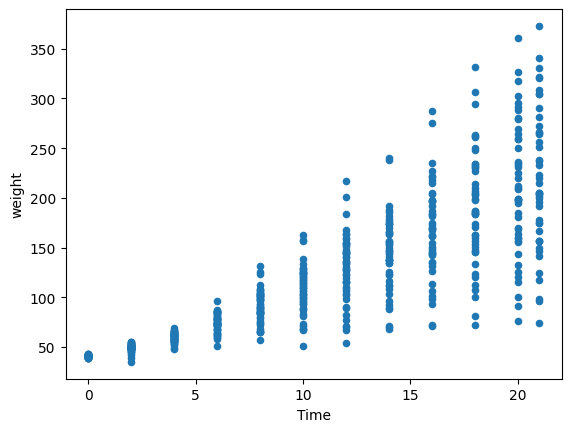

In [248]:
chicken_df.plot(kind='scatter', x='Time', y='weight');

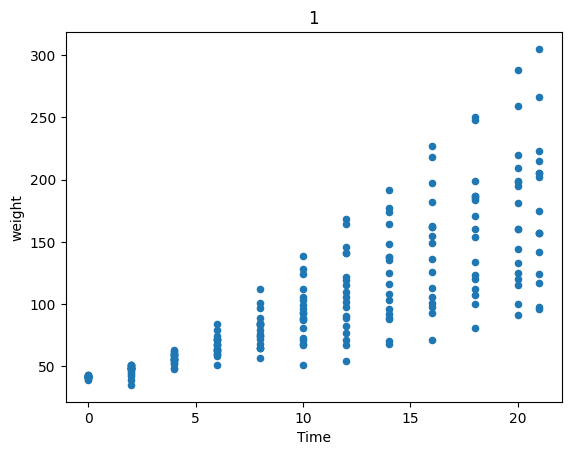

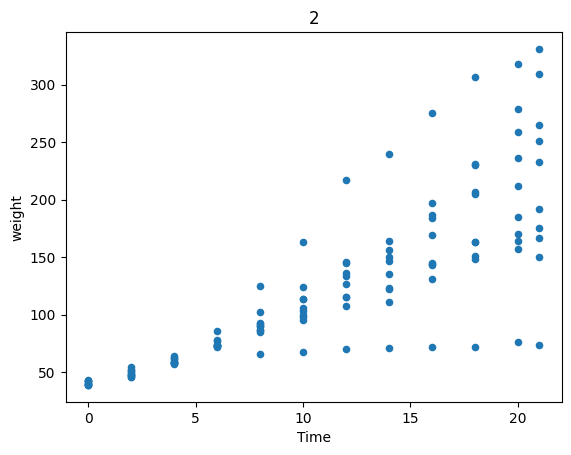

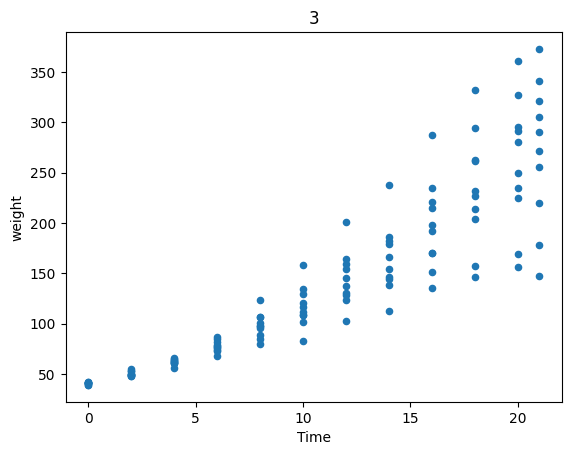

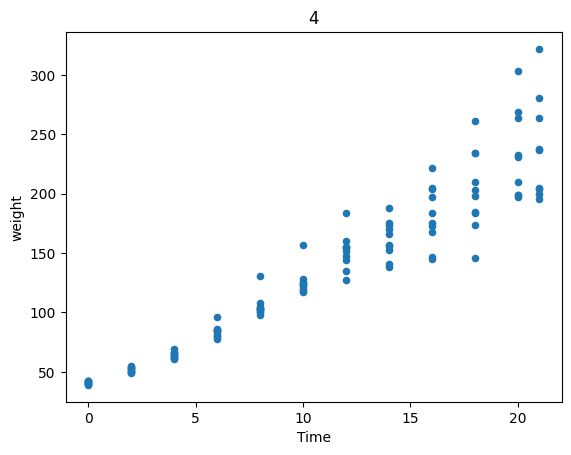

In [251]:
import matplotlib.pyplot as plt

for diet, small_df in chicken_df.groupby('Diet'):
    small_df.plot(kind='scatter', x='Time', y='weight')
    plt.title(diet)
    plt.show()

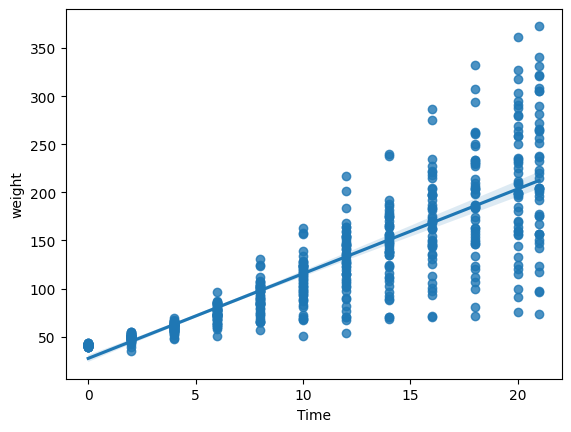

In [254]:
sns.regplot(data=chicken_df, x='Time', y='weight');